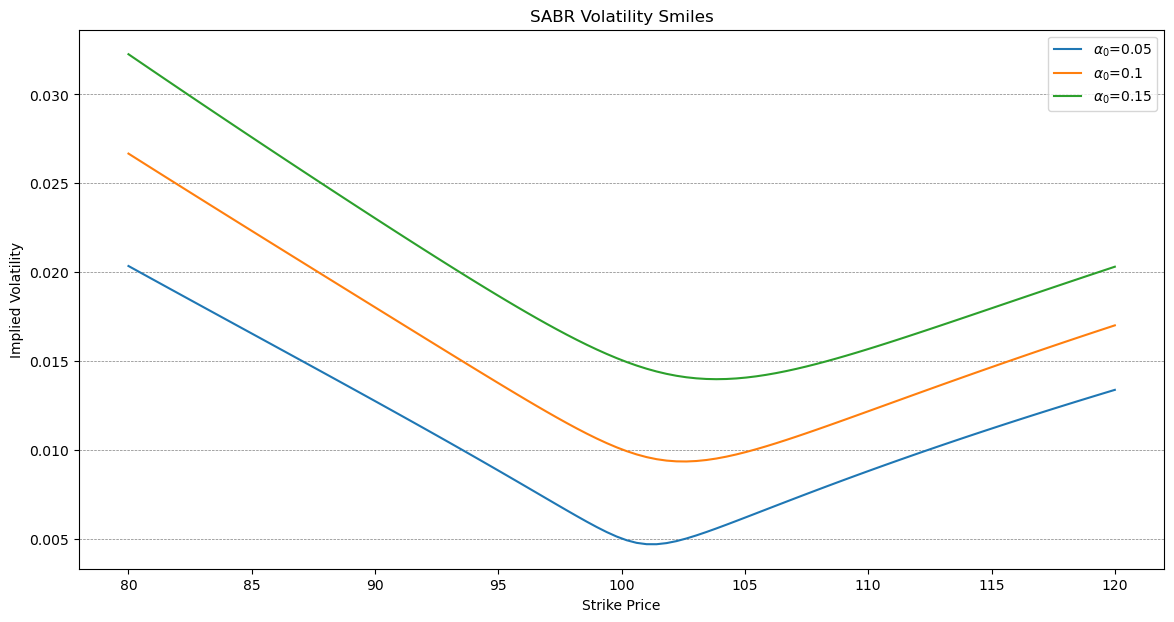

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def sabr_volatility(F, K, T, alpha, beta, rho, nu):
    """
    Calculate the SABR model implied volatility.

    Parameters:
    - F: Forward rate (or spot price) of the underlying.
    - K: Strike price.
    - T: Time to maturity.
    - alpha: Volatility of the forward rate.
    - beta: Elasticity parameter.
    - rho: Correlation between forward rate and its volatility.
    - nu: Volatility of volatility.

    Returns:
    - sigma: The implied volatility from the SABR model.
    """
    if F == K:
        # When F equals K, the formula simplifies dramatically.
        fk_beta = F**(1-beta)
        vol = (alpha / fk_beta) * (1 + ((1-beta)**2 * alpha**2 / (24 * fk_beta**2) + 
              rho * beta * nu * alpha / (4 * fk_beta) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    else:
        fk_beta = F**(1-beta) * K**(1-beta)
        z = nu / alpha * fk_beta**0.5 * np.log(F / K)
        x_z = np.log((np.sqrt(1 - 2 * rho * z + z**2) + z - rho) / (1 - rho))
        vol = (alpha / fk_beta**0.5 * z / x_z) * (1 + ((1-beta)**2 * alpha**2 / (24 * fk_beta) +
              rho * beta * nu * alpha / (4 * fk_beta**0.5) + (2 - 3 * rho**2) * nu**2 / 24) * T)
    return vol

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.

    Parameters:
    - F: Forward rate of the underlying.
    - T: Time to maturity.
    - alpha, beta, rho, nu: SABR parameters.
    - strikes: Array of strike prices.
    """
    plt.figure(figsize=(14, 7))
    
    for a in alpha:
        vols = [sabr_volatility(F, k, T, a, beta, rho, nu) for k in strikes]
        strikes_=np.linspace(-200, 200, 10) 
        plt.plot(strikes, vols, label=f'$\\alpha_0$={a}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Parameters for plotting
F = 100  # Spot price of the underlying - forward price
T = 1    # Time to maturity (1 year)
alpha = [0.05, 0.1, 0.15]  # Different values for alpha to see the effect on volatility smile
beta = 0.5
rho = -0.4
nu = 0.25
strikes = np.linspace(80, 120, 100)  # Strike prices from -200 to 200


# Call the function to plot volatility smiles
plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)  # Uncomment this line when ready to plot
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR1_alpha.png")
plt.show()
plt.close()


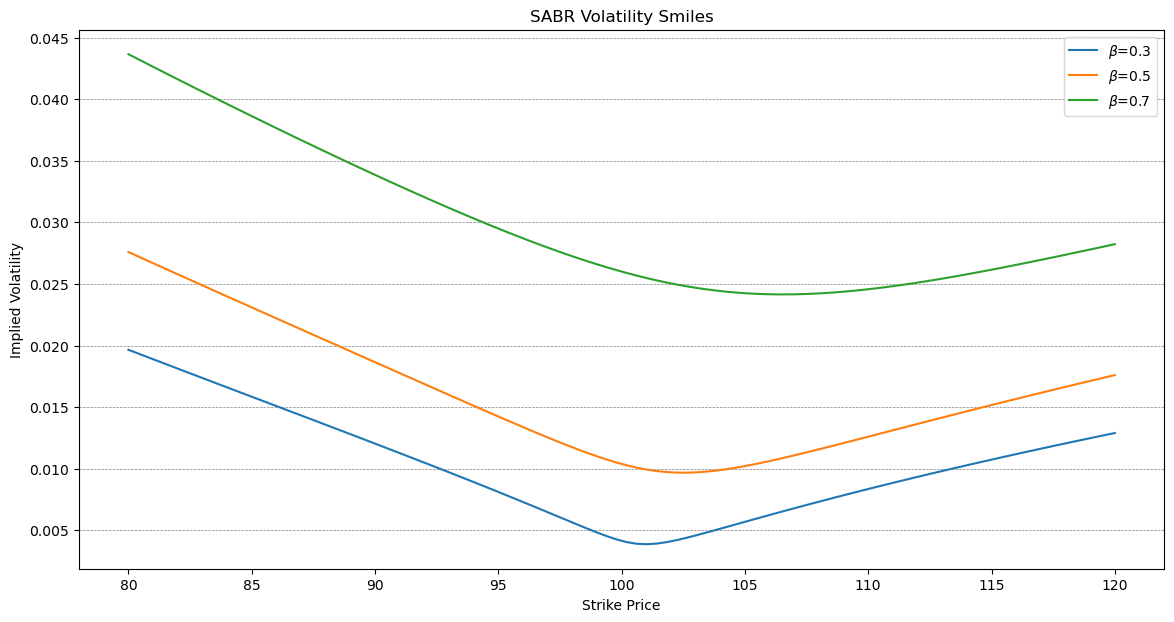

In [18]:
def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.

    Parameters:
    - F: Forward rate of the underlying.
    - T: Time to maturity.
    - alpha, beta, rho, nu: SABR parameters.
    - strikes: Array of strike prices.
    """
    plt.figure(figsize=(14, 7))
    
    for b in beta:
        vols = [sabr_volatility(F, k, T, alpha, b, rho, nu) for k in strikes]
        strikes_=np.linspace(-200, 200, 10) 
        plt.plot(strikes, vols, label=f'$\\beta$={b}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Parameters for plotting
F = 100  # Spot price of the underlying
T = 10    # Time to maturity (1 year)
alpha = 0.1 # Different values for alpha to see the effect on volatility smile
beta = [0.3, 0.5, 0.7]
rho = -0.4
nu = 0.25
strikes = np.linspace(80, 120, 100)  # Strike prices from -200 to 200

# Call the function to plot volatility smiles
plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)  # Uncomment this line when ready to plot
plt.savefig("/Users/nannaingemannohrt/Desktop/master_thesis/main/plots/SABR_beta.png")
plt.show()
plt.close()


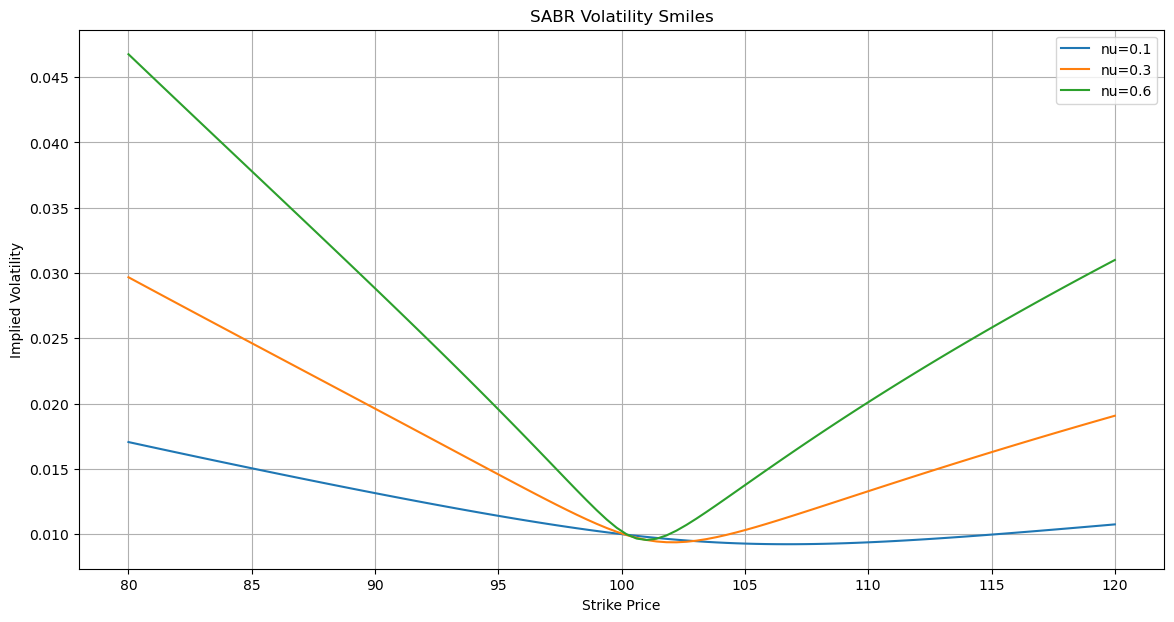

In [10]:

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.

    Parameters:
    - F: Forward rate of the underlying.
    - T: Time to maturity.
    - alpha, beta, rho, nu: SABR parameters.
    - strikes: Array of strike prices.
    """
    plt.figure(figsize=(14, 7))
    
    for n in nu:
        vols = [sabr_volatility(F, k, T, alpha, beta, rho, n) for k in strikes]
        strikes_=np.linspace(-200, 200, 10) 
        plt.plot(strikes, vols, label=f'nu={n}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters for plotting
F = 100  # Spot price of the underlying
T = 1    # Time to maturity (1 year)
alpha = 0.1 # Different values for alpha to see the effect on volatility smile
beta = 0.5
rho = -0.4
nu = [0.1, 0.30, 0.6]
strikes = np.linspace(80, 120, 100)  # Strike prices from -200 to 200

# Call the function to plot volatility smiles
plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)  # Uncomment this line when ready to plot


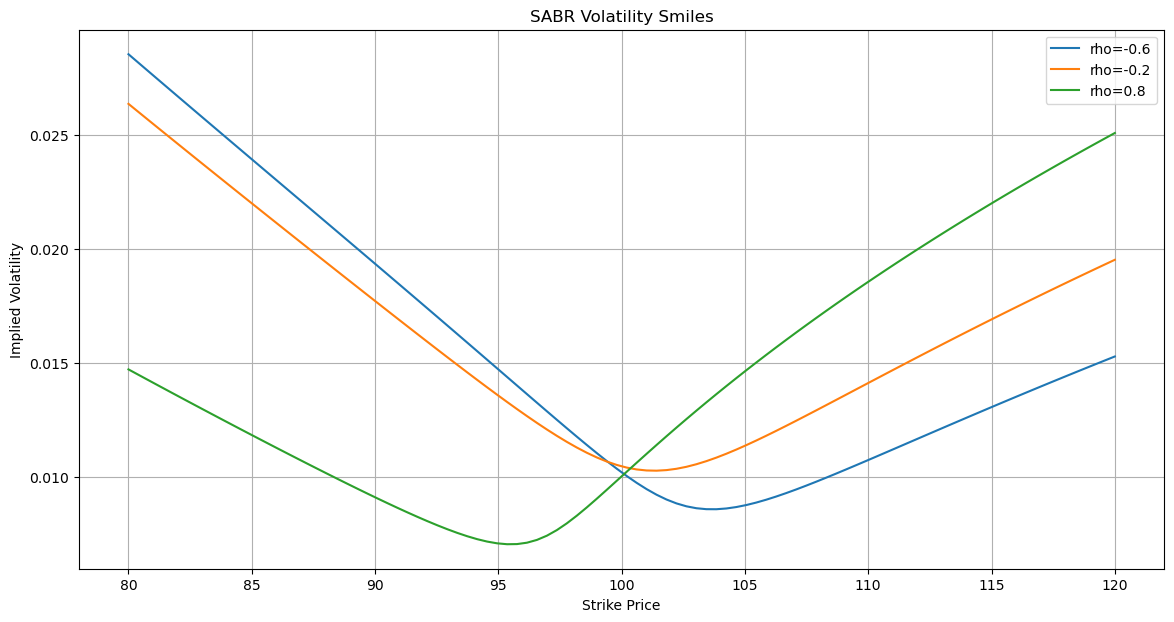

In [4]:

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.

    Parameters:
    - F: Forward rate of the underlying.
    - T: Time to maturity.
    - alpha, beta, rho, nu: SABR parameters.
    - strikes: Array of strike prices.
    """
    plt.figure(figsize=(14, 7))
    
    for r in rho:
        vols = [sabr_volatility(F, k, T, alpha, beta, r, nu) for k in strikes]
        strikes_=np.linspace(-200, 200, 10) 
        plt.plot(strikes, vols, label=f'rho={r}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters for plotting
F = 100  # Spot price of the underlying
T = 10    # Time to maturity (1 year)
alpha = 0.1 # Different values for alpha to see the effect on volatility smile
beta = 0.5
rho = [-0.6, -0.2,0.8]
nu = 0.25
strikes = np.linspace(80, 120, 100)  # Strike prices from -200 to 200

# Call the function to plot volatility smiles
plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)  # Uncomment this line when ready to plot


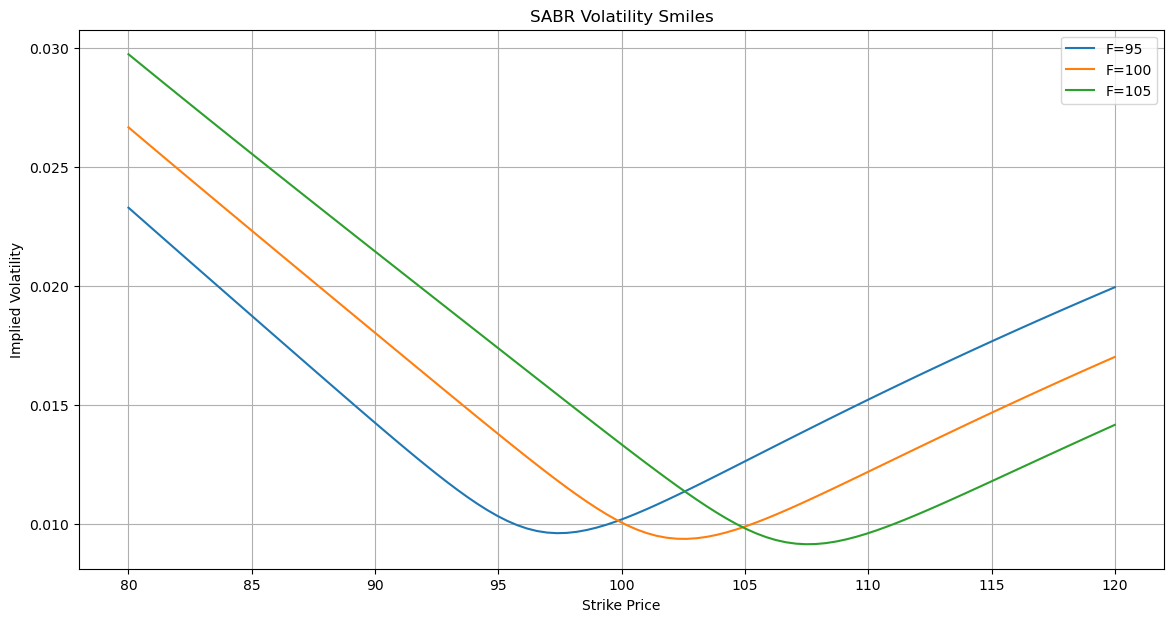

In [5]:

def plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes):
    """
    Generate volatility smile plots for different SABR parameters.

    Parameters:
    - F: Forward rate of the underlying.
    - T: Time to maturity.
    - alpha, beta, rho, nu: SABR parameters.
    - strikes: Array of strike prices.
    """
    plt.figure(figsize=(14, 7))
    
    for f in F:
        vols = [sabr_volatility(f, k, T, alpha, beta, rho, nu) for k in strikes]
        strikes_=np.linspace(-200, 200, 10) 
        plt.plot(strikes, vols, label=f'F={f}')
    
    plt.title('SABR Volatility Smiles')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters for plotting
F = [95,100,105]  # Spot price of the underlying
T = 1    # Time to maturity (1 year)
alpha = 0.1 # Different values for alpha to see the effect on volatility smile
beta = 0.5
rho = -0.4
nu = 0.25
strikes = np.linspace(80, 120, 100)  # Strike prices from -200 to 200

# Call the function to plot volatility smiles
plot_volatility_smiles(F, T, alpha, beta, rho, nu, strikes)  # Uncomment this line when ready to plot
